### Google Trend  

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
#set plot type
plt.rcParams['figure.figsize'] = (15, 3)
font = {'family': 'Segoe Script', 'weight': 'normal', 'size': 15}
plt.rc('font',**font)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.unicode_minus']=False #show minus
spdr = ['SPY','XLI','XLV','XLK','XLE','XLF'] # spdr sector'XLI

In [2]:
df_g = pd.read_excel('google_trend.xlsx')
date_ = df_g['date']
df_g.set_index('date', inplace=True)
df_g.loc['2015-05-01':].tail()

,DIA ETF,isPartial,SPY ETF,QQQ ETF,IVV ETF,XLI ETF,XLV ETF,XLK ETF,XLE ETF,XLF ETF,IYW ETF,IYF ETF,IYE ETF,IYH ETF,IHE ETF,IBB ETF,SMH ETF,XLB ETF,XLP ETF,XLY ETF
date,,,,,,,,,,,,,,,,,,,,
2019-04-28,27,False,20,62,76,55,28,49,8,13,33,42,0,0,44,38,40,21,16,35
2019-05-05,32,False,35,50,80,18,21,34,10,20,0,0,0,0,0,21,20,0,0,34
2019-05-12,22,False,38,68,61,18,21,34,10,17,49,0,0,0,0,25,60,43,32,21
2019-05-19,22,False,23,65,50,0,41,48,18,23,64,0,0,38,0,17,20,21,48,20
2019-05-26,17,False,30,59,35,18,0,24,10,13,0,0,0,0,0,8,59,0,24,20


In [35]:
df_d = pd.read_csv('industry_etf_bydate.csv') # data(price,volume)
df_d['date'] = pd.to_datetime(df_d['date']) # convert to datetime
df_week = df_d[df_d['date'].dt.weekday == 0] # weekly data   
df_d.set_index('date', inplace=True)
df_week.set_index('date', inplace=True)
df_week = df_week.shift(-1, freq='D') #shift back 1 day to fit google trend data(sunday)

df_week[df_week['Symbols'] == 'SPY']['close'].tail()

date
2019-03-31    285.83
2019-04-07    288.79
2019-04-14    289.97
2019-04-21    290.27
2019-04-28    293.87
Name: close, dtype: float64

In [36]:
def sort(sym):
    c = df_week[df_week['Symbols'] == sym]['close']
    v = df_week[df_week['Symbols'] == sym]['volume']
    g = df_g[sym+' ETF']
    df_ = pd.merge(c,v,how='outer',left_index=True,right_index=True).dropna()
    df_ = pd.merge(df_,g,how='outer',left_index=True,right_index=True).dropna()
    return df_
sort('XLK').head()

,close,volume,XLK ETF
date,,,
2015-05-03,40.4159,7698750.0,12
2015-05-10,40.1068,6046481.0,35
2015-05-17,40.7719,3393310.0,18
2015-05-31,40.7438,6936313.0,0
2015-06-07,39.7882,8379498.0,0


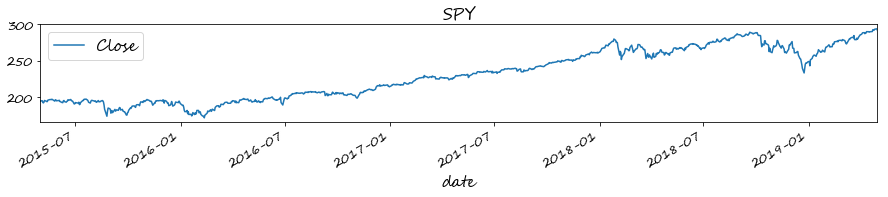

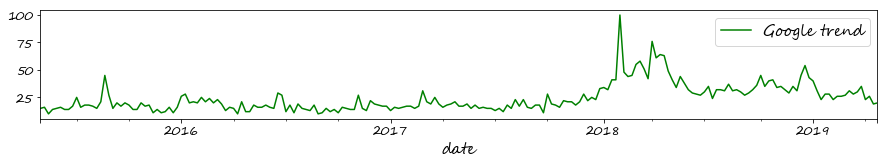

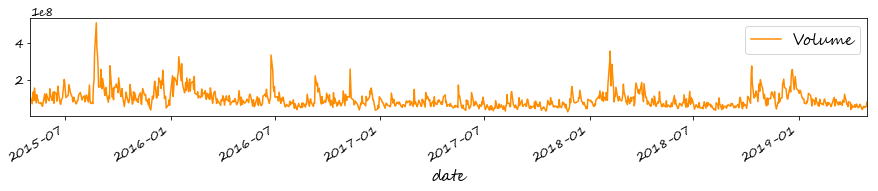

In [37]:
def compare(sym): # plot close, google trend and volume
    fig = plt.figure(figsize=(15, 2))
    plt.title(sym,fontsize=16)
    close_spy = df_d[df_d['Symbols'] == sym]['close'].loc['2015-05-01':'2019-05-01']
    volume_spy = df_d[df_d['Symbols'] == sym]['volume'].loc['2015-05-01':'2019-05-01']
    close_spy.plot(label='Close')
    plt.legend()
    
    plt.figure(figsize=(15, 2))
    df_g[sym+' ETF'].loc['2015-05-01':'2019-05-01'].plot(color='g',label='Google trend')
    plt.legend()
    
    plt.figure(figsize=(15, 2))
    volume_spy.plot(color='darkorange',label='Volume')
    plt.legend()

compare('SPY')

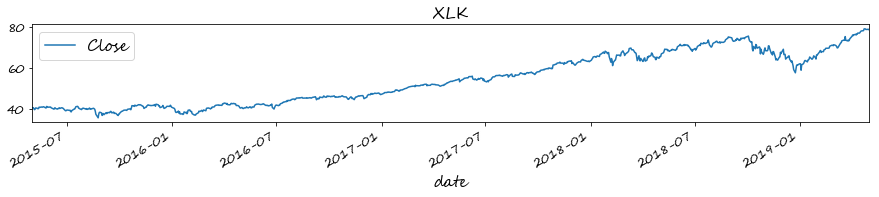

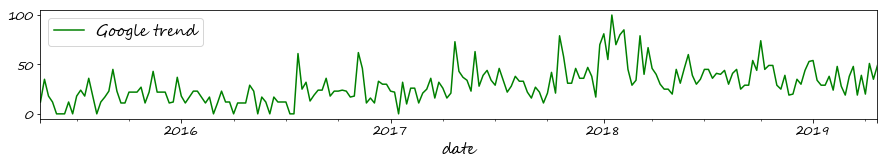

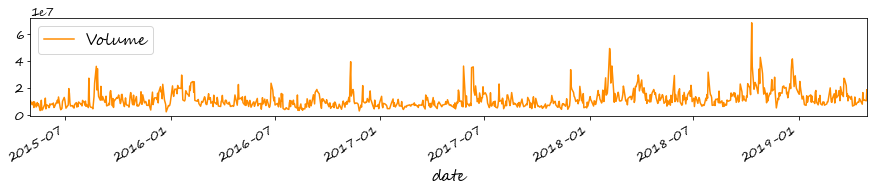

In [38]:
compare('XLK')

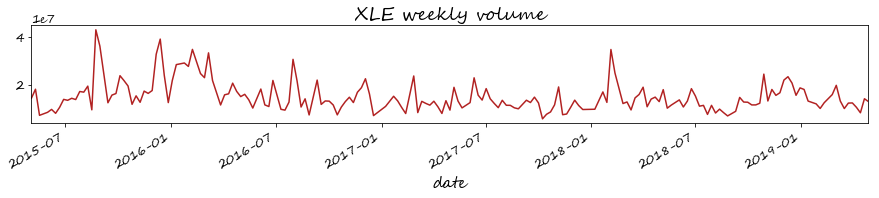

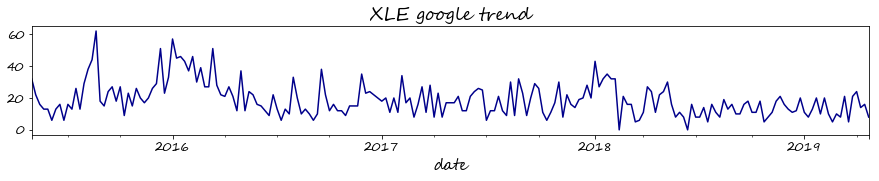

In [39]:
fig = plt.figure(figsize=(15, 2))
plt.title('XLE weekly volume')
df_week[df_week['Symbols'] == 'XLE']['volume'].plot(color='firebrick')

fig = plt.figure(figsize=(15, 2))
plt.title('XLE google trend')
df_g['XLE ETF'].loc['2015-05-01':'2019-05-01'].plot(color='darkblue')

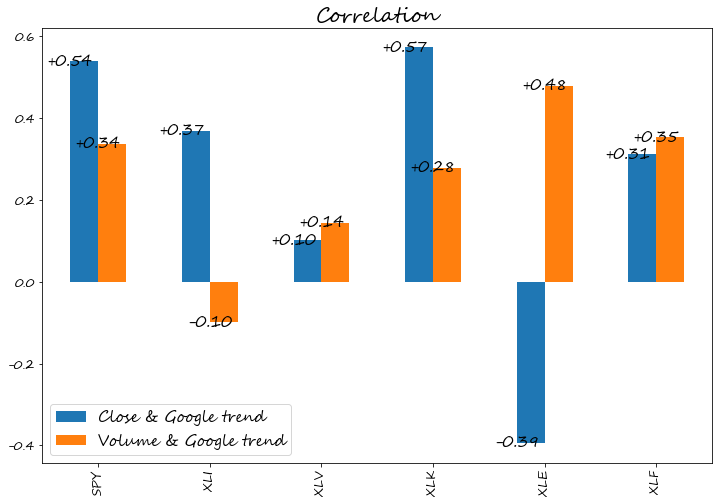

In [40]:
#print(len(spyc1[1:]),len(df['SPY ETF'].loc['2015-05-01':'2019-05-01'][:-4]))
corr_cg = []
corr_vg = []

def corr(sym):
    close_ = sort(sym)['close']
    volume_ = sort(sym)['volume']
    google_ = sort(sym)[sym+' ETF']
    cor_cg = pd.merge(close_,google_,how='outer',left_index=True,right_index=True)
    cor_vg = pd.merge(volume_,google_,how='outer',left_index=True,right_index=True)
    
    corr_cg.append(cor_cg.corr(method ='pearson').iloc[0,1])
    corr_vg.append(cor_vg.corr(method ='pearson').iloc[0,1])

spdr = ['SPY','XLI','XLV','XLK','XLE','XLF'] # spdr sector'XLI
for i in spdr:
    corr(i)

df_corr = pd.DataFrame({'Close & Google trend': corr_cg, 'Volume & Google trend': corr_vg}, index=spdr)
ax = df_corr.plot.bar(figsize=(12,8),fontsize=12)
plt.title('Correlation',fontsize=20)

# add annotation
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x(), p.get_y()+p.get_height(),
             '{:+.2f}'.format(height),ha='center', va='center')

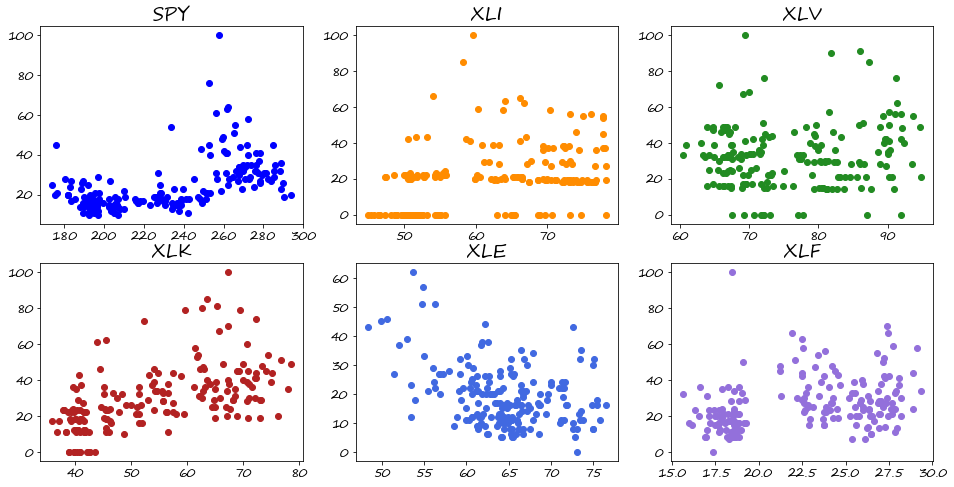

In [69]:
def plot_scat(data):    
    l, k, c = 0,0,0
    fig,axes=plt.subplots(2,3,figsize=(16,8))
    colors = ['blue','darkorange','forestgreen','firebrick','royalblue','mediumpurple']
    for i in spdr:
        x = sort(i)[data]
        y = sort(i)[i+' ETF']
    
        if i == spdr[0] or i == spdr[1] or i == spdr[2]:
            axes[0,l].scatter(x,y,color=colors[c])
            axes[0,l].set_title(i)
            l += 1
        else:
            axes[1,k].scatter(x,y,color=colors[c])
            axes[1,k].set_title(i)
            k += 1
        c += 1
        
plot_scat('close')

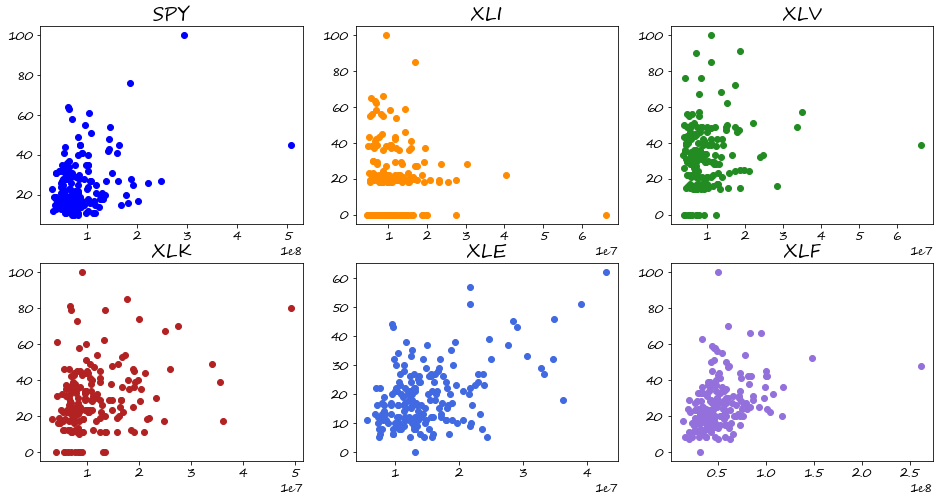

In [70]:
plot_scat('volume')